# Machine Learning Pipeline - Data Analysis

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline.

We will discuss:

- **Data Analysis**
- Feature Engineering
- Feature Selection
- Model Training
- Model Evaluation

## Predicting Used Car Prices

The aim of the project is to build a machine learning model that estimates the sale price of used cars based on different explanatory variables describing aspects of cars.

### Why is this important?

Predicting used car prices is useful in pricing auto insurance premiums and replacement costs insured cars.

### What is the objective of the machine learning model?
We aim to minimise the difference between the real price and the estimated price from the model. We will evaluate model performance with the:
1. Mean Squared Error (MSE).
2. Root Mean Squared Error (RMSE).
3. R-Squared (r2).

# Data Analysis

Let's go ahead and load the dataset.

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
data = pd.read_csv('CarPrice_Assignment.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# drop car_ID, it is just an identification number
data = data.drop('car_ID', axis=1)
data.shape

(205, 25)

The car price dataset contains 205 rows, i.e. cars, and 25 columns, i.e. variables.

## Analysis

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous

5. Categorical variables
    - Cardinality
    - Rare Labels

## Target

Let's begin by exploring the target distribution.

Text(0.5, 0, 'Price')

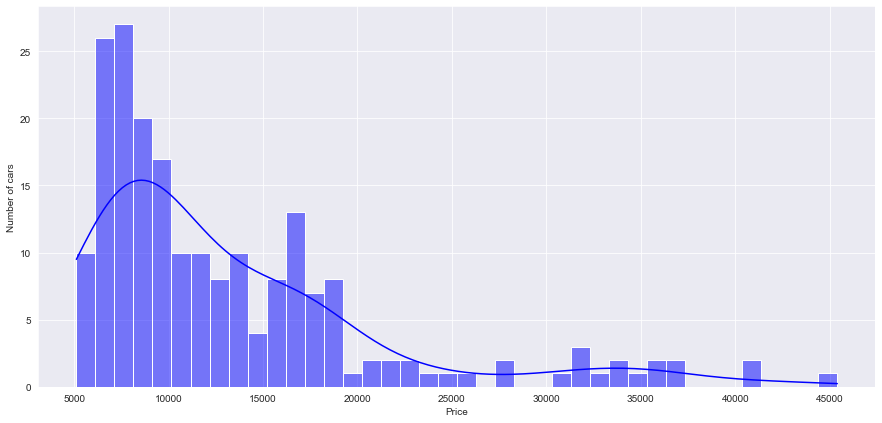

In [4]:
plt.figure(figsize=(15,7))
sns.histplot(x='price', bins=40, kde=True, color='blue', alpha=0.5, data=data)
plt.ylabel('Number of cars')
plt.xlabel('Price')

We can see that the target is continuous and skewed towards the right. From an eye-test, it doesn't exactly look normal or Gaussian-like. Let's confirm this assesment with a quantile-quantile plot.

### Quantile-Quantile Plot

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


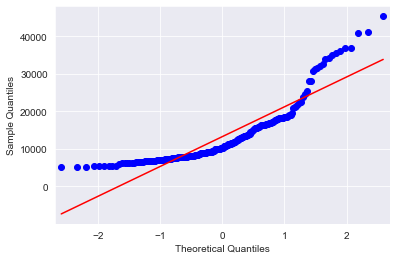

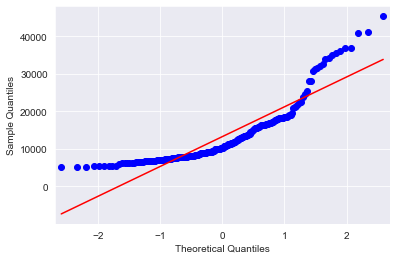

In [6]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data['price'],line='s')

There are too many points lying outside the line. We can conclude that the distribution is not normal. This means we will be adopting nonparametric tests in assessing the relationships between the different variables and the target during feature selection.

## Variable Types

Let's identify the categorical and numerical variables

In [8]:
# to identify categorical variables,
# we will capture those of type *object*
cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# print out the categorical variables
cat_vars

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [9]:
# number of categorical variables
len(cat_vars)

10

In [10]:
# now let's identify the numerical variables
num_vars = [var for var in data.columns if var not in cat_vars and var != 'price']

# print out the numerical variables
num_vars

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [11]:
len(num_vars)

14

# Missing Values

Let's go ahead and find out which variables of the dataset contain missing values.

In [12]:
# make a lsit of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data
data[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

We have no missing values in the dataset.

# Numerical Variables

Let's go ahead and find out what numerical variables we have in the dataset.

In [13]:
print(f'Number of numerical variables: {len(num_vars)}')

Number of numerical variables: 14


In [14]:
# visualise the numerical variables
data[num_vars].head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


## Discrete Variables

Let's go ahead and find which variables are discrete, i.e. showing a finite number of values.

In [23]:
# let's make a list of discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20]
print(f'Number of discrete variables: {len(discrete_vars)}')

Number of discrete variables: 1


In [24]:
data[discrete_vars].head()

,symboling
0,3
1,3
2,1
3,2
4,2


In [25]:
data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

<AxesSubplot:xlabel='symboling', ylabel='count'>

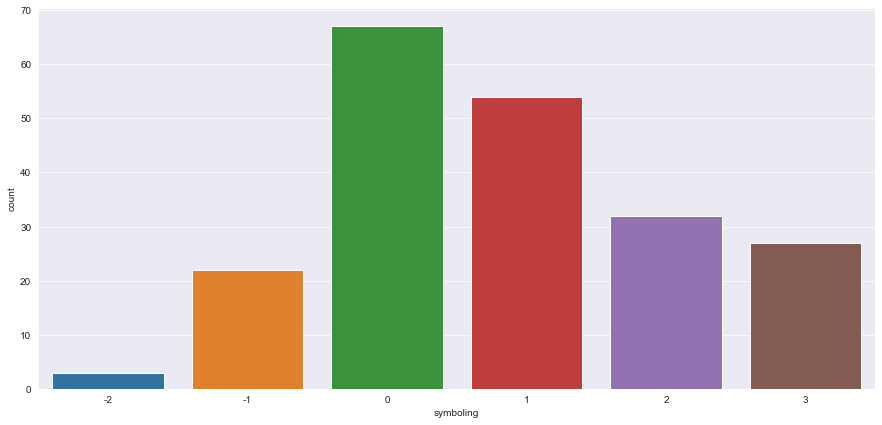

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(x='symboling',data=data)

The symboling variable has just 6 distinct variables. Let's print out the rank values for the different catgeories.

In [26]:
from scipy.stats import rankdata

tmp = data.copy() # copy the dataframe to avoid over-writing
tmp = tmp.sort_values(by=['price']) # sort the dataframe by price
ranked = rankdata(tmp['price']) # rank the dataframe by the price column
tmp['rank'] = ranked # put the rank values in a new column
tmp.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,rank
138,2,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0,1.0
18,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0,2.0
50,1,maxda rx3,gas,std,two,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195.0,3.0
150,1,toyota corona mark ii,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,1985,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348.0,4.0
76,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,50.8,1918,ohc,four,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389.0,5.0


In [27]:
for feature in discrete_vars:
    print(f'{feature} rank sums')
    for category in list(tmp[feature].unique()):
        rank_sum = tmp[tmp[feature]==category]['rank'].sum()
        print(f'{category}: {rank_sum}')
    print()

symboling rank sums
2: 2619.0
1: 3427.0
0: 7571.5
3: 3883.0
-1: 3165.5
-2: 449.0



We will determine the predictive association between these variables and the target in the feature selection notebook.

## Continuous Variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not discrete.

In [28]:
# make a list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]
print(f'Number of continuous variables: {len(cont_vars)}')

Number of continuous variables: 13


In [29]:
# visualise the continuous variables
data[cont_vars].head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [30]:
data[cont_vars].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


Let's plot histograms for all the continuous variables:

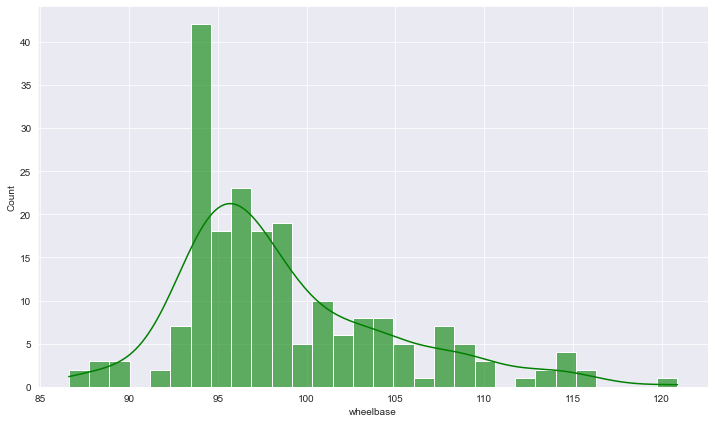

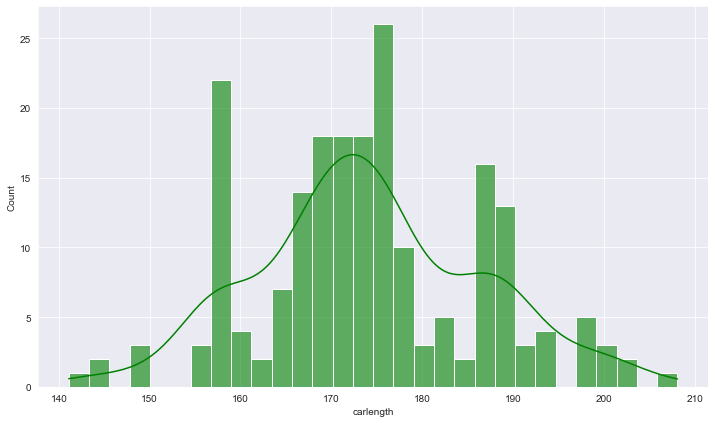

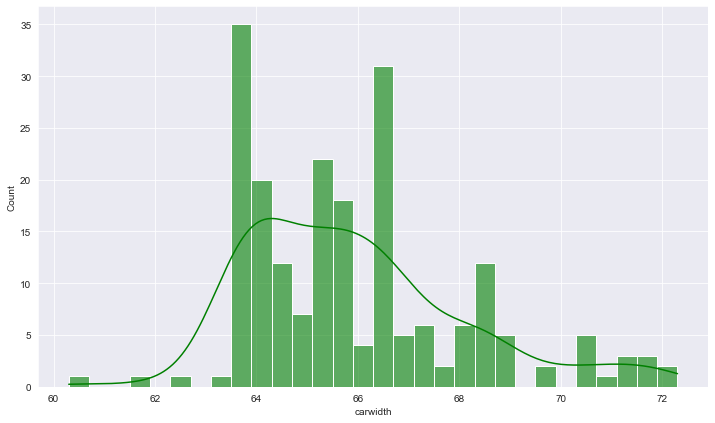

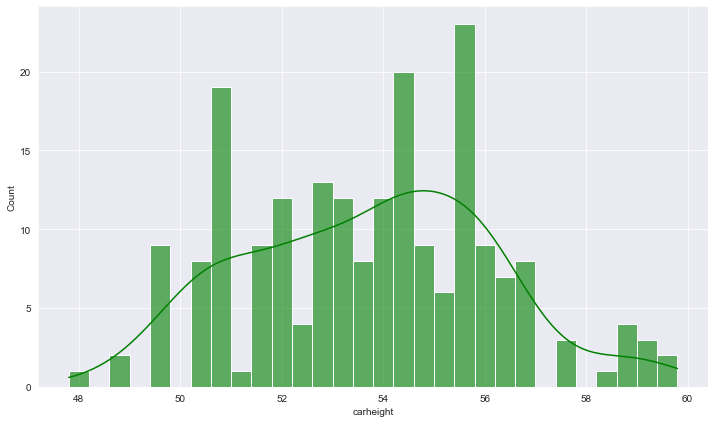

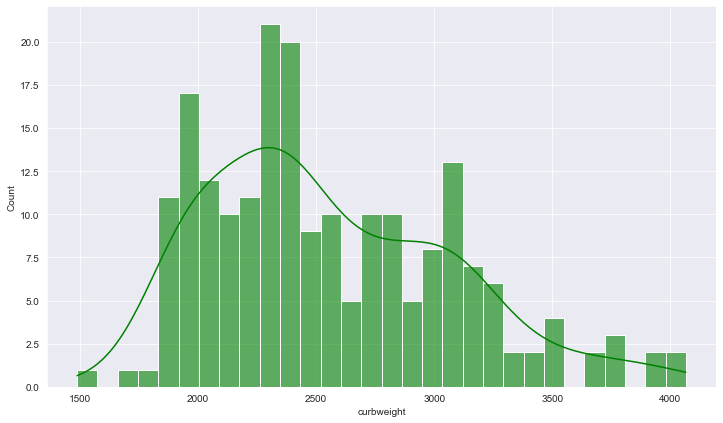

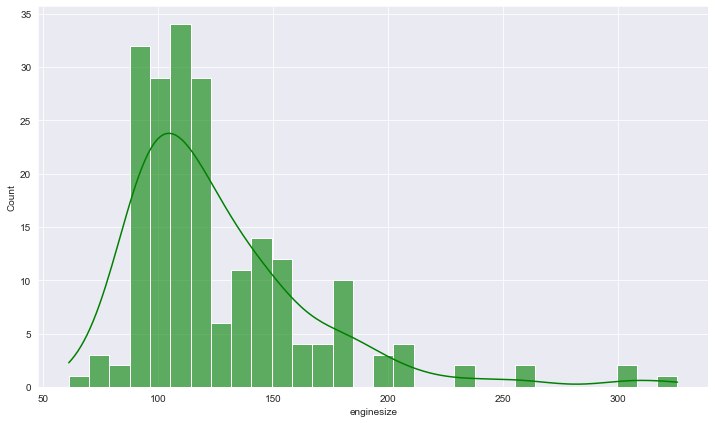

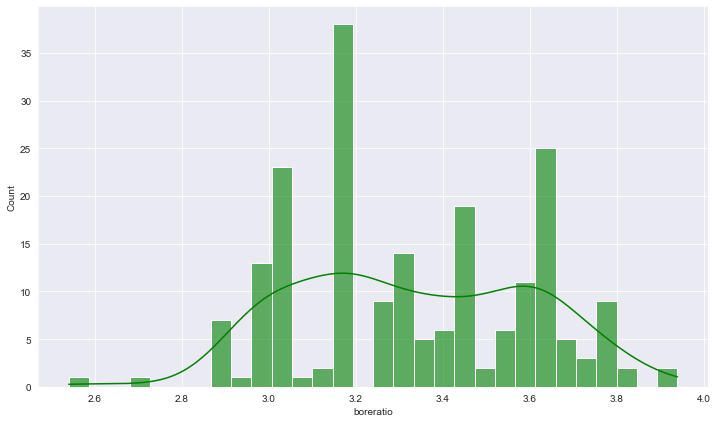

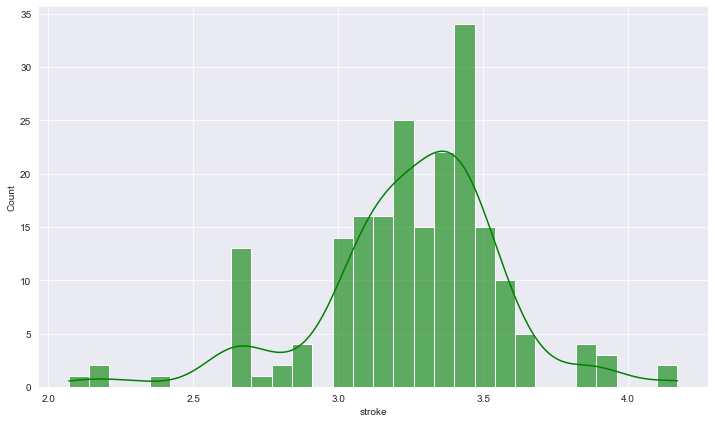

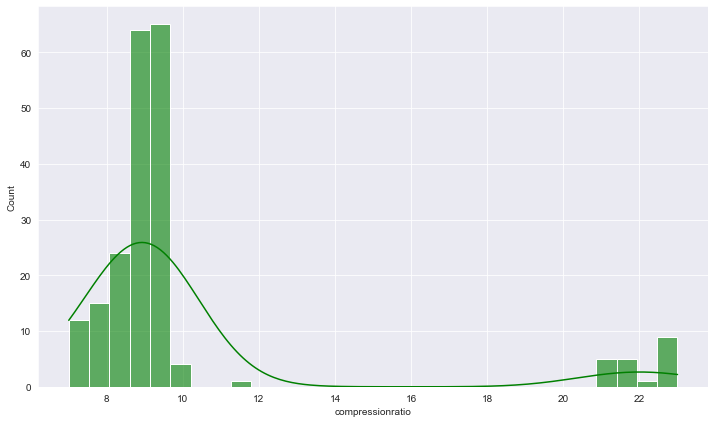

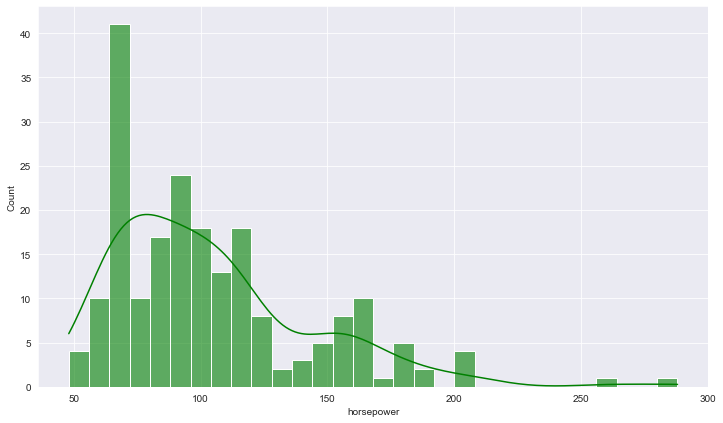

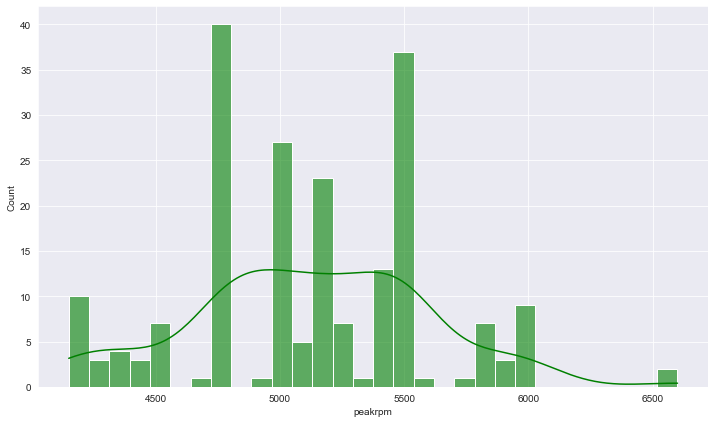

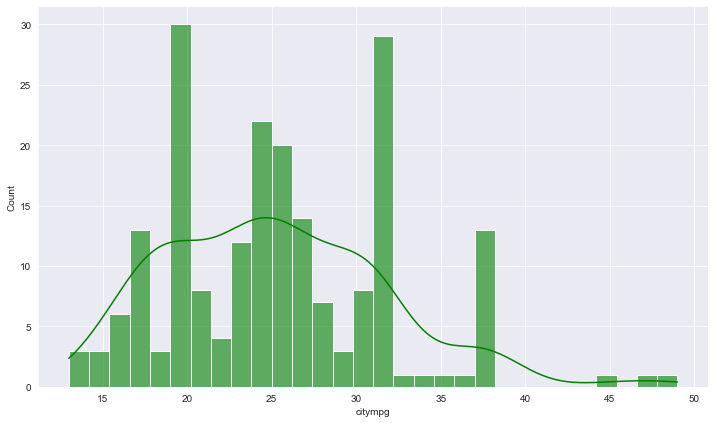

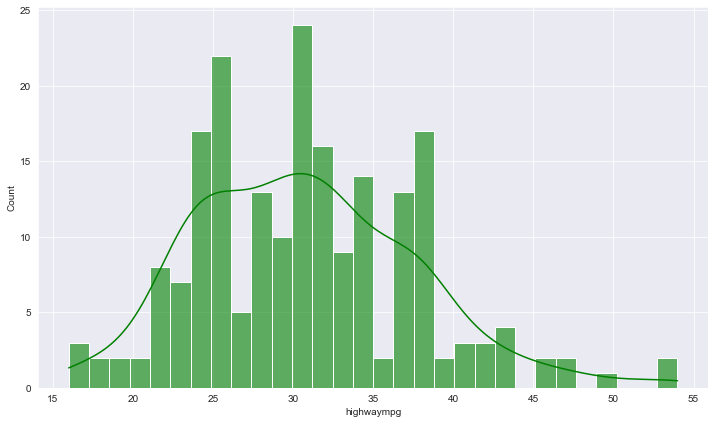

In [31]:
for var in cont_vars:
    plt.figure(figsize=(12,7))
    sns.histplot(x=var, data=data, bins=30, color='green', alpha=0.6, kde=True)

Some of these variables could be transformed for normality but as a safety check, we will leave them as they are and apply nonparametric methods with them.

Let's see if there is a relationship between price and the continuous variables.

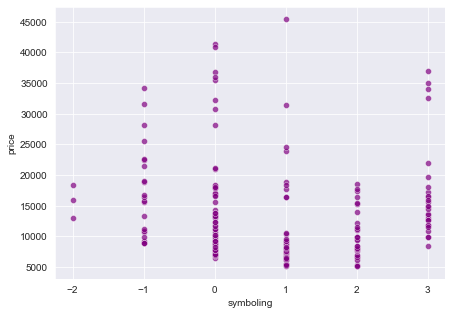

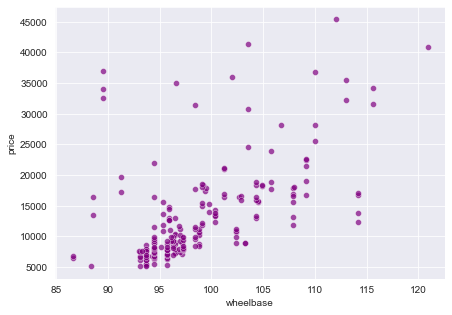

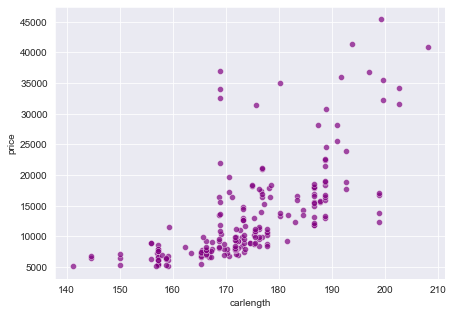

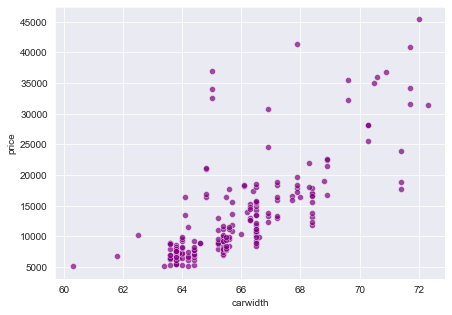

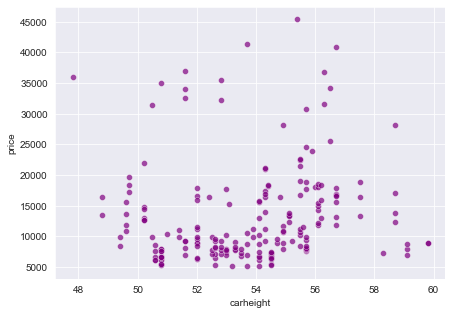

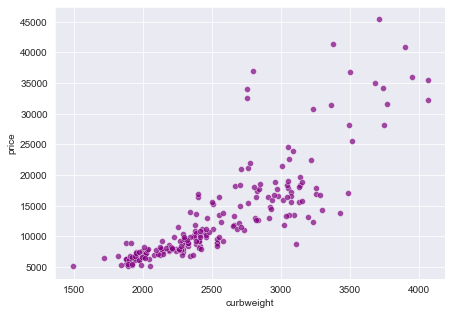

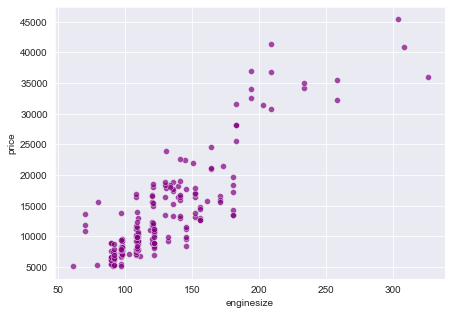

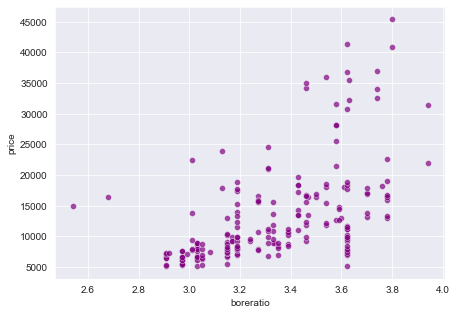

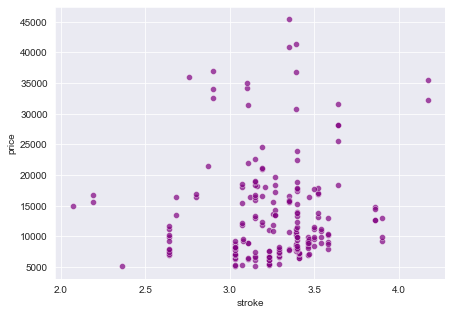

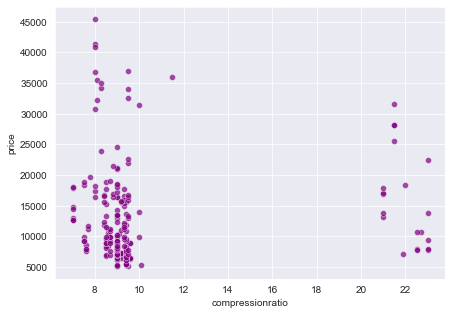

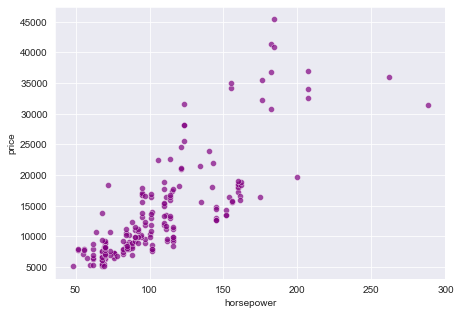

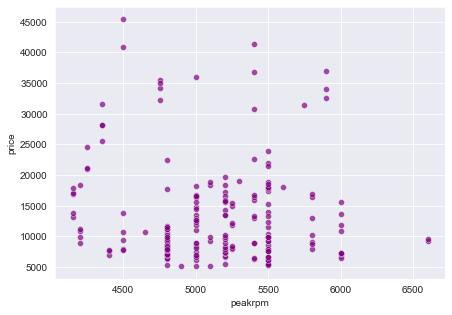

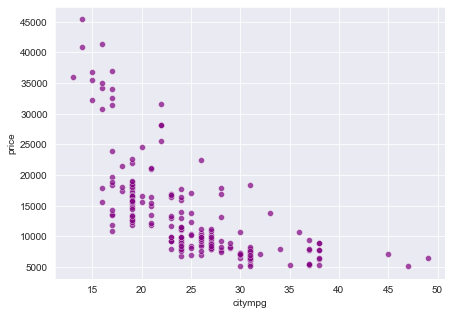

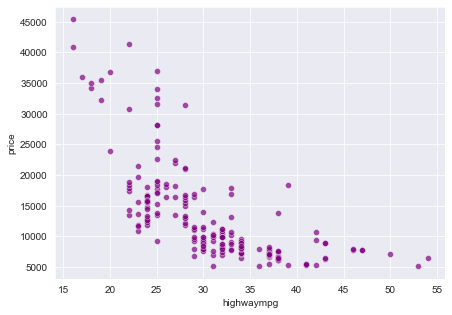

In [33]:
for var in num_vars:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=var, y='price', data=data, alpha=0.7, color='purple')
    plt.ylabel('price')
    plt.xlabel(var)

Variables that show strong association with sale price are:

Postive association:
- wheelbase
- carlength
- carwidth
- curbweight
- enginesize
- boreratio
- horsepower

Negative association:
- citympg
- highwaympg

The negative association variables essentially highlight the proce relationship with gas/fuel/diesel efficiency. Cars that burn less per distance would typically sell for higher.

# Categorical Variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [34]:
print(f'Number of categorical variables: {len(cat_vars)}')

Number of categorical variables: 10


In [35]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [36]:
# rank sums of the categorical features
for feature in cat_vars:
    print(f'{feature} rank sums')
    for category in list(tmp[feature].unique()):
        rank_sum = tmp[tmp[feature]==category]['rank'].sum()
        print(f'{category}: {rank_sum}')
    print()

CarName rank sums
subaru: 36.0
chevrolet impala: 2.0
maxda rx3: 3.0
toyota corona mark ii: 4.0
mitsubishi mirage: 5.0
honda civic: 150.0
Nissan versa: 7.0
plymouth fury iii: 21.0
dodge rampage: 8.5
maxda glc deluxe: 10.0
mitsubishi lancer: 11.0
dodge monaco (sw): 12.5
chevrolet monte carlo: 14.0
toyota corona: 433.5
dodge challenger se: 16.0
toyota corolla 1200: 55.0
honda accord cvcc: 19.0
chevrolet vega 2300: 20.0
nissan rogue: 103.0
mitsubishi outlander: 232.5
dodge colt hardtop: 23.5
plymouth satellite custom (sw): 23.5
mazda rx-4: 127.0
isuzu MU-X: 26.0
mazda rx2 coupe: 27.0
nissan latio: 72.0
honda civic cvcc: 65.0
toyota corona hardtop: 30.0
toyota mark ii: 229.0
mitsubishi montero: 32.0
subaru dl: 257.0
nissan gt-r: 34.0
honda accord lx: 38.5
honda civic 1500 gl: 38.5
nissan leaf: 40.0
nissan titan: 41.0
mazda glc deluxe: 149.0
subaru trezia: 43.0
dodge colt (sw): 46.5
plymouth fury gran sedan: 46.5
mitsubishi g4: 261.0
vokswagen rabbit: 50.5
subaru brz: 50.5
toyota corolla: 51

The CarName column is going to need some adjustments during feature engineering. Most of the spellings are wrong and it has way too many categories for a categorical variable.

## Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

<AxesSubplot:>

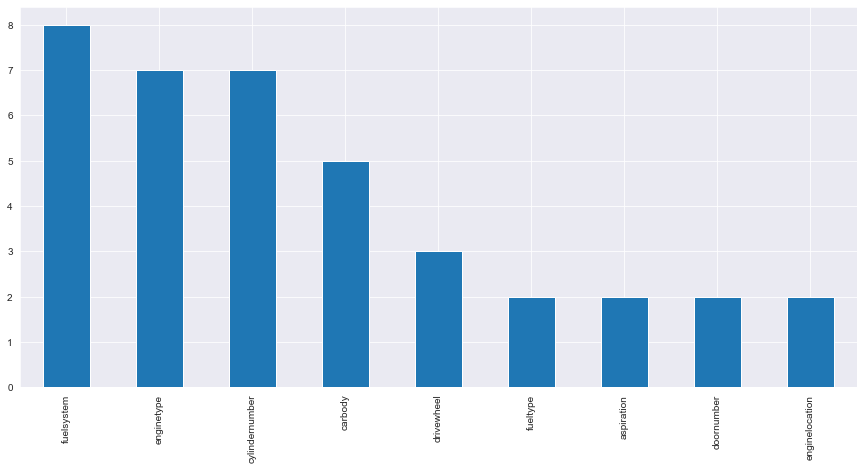

In [37]:
# exclude CarName since its categories will be collapsed in feature engineering
data[cat_vars].drop('CarName',axis=1).nunique().sort_values(ascending=False).plot.bar(figsize=(15,7))

In [38]:
for var in cat_vars:
    print(f'{var}: {data[var].nunique()}')

CarName: 147
fueltype: 2
aspiration: 2
doornumber: 2
carbody: 5
drivewheel: 3
enginelocation: 2
enginetype: 7
cylindernumber: 7
fuelsystem: 8


All the categorical variables show low cardinality, i.e. only few different labels. This means we won't need to tackle cardinality during our feature engineering lecture.

## Rare Labels

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [39]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    
    # determine the % of observations per category
    tmp = df.groupby(var)['price'].count() / len(df)
    
    # return categories that are rare
    return tmp[tmp < rare_perc]

In [40]:
# print categories present in less than 
# 1% of the observations

for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

CarName
Nissan versa                0.004878
alfa-romero Quadrifoglio    0.004878
alfa-romero giulia          0.004878
alfa-romero stelvio         0.004878
audi 100 ls                 0.004878
                              ...   
volvo 246                   0.004878
volvo 264gl                 0.009756
volvo diesel                0.004878
vw dasher                   0.004878
vw rabbit                   0.004878
Name: price, Length: 137, dtype: float64

Series([], Name: price, dtype: float64)

Series([], Name: price, dtype: float64)

Series([], Name: price, dtype: float64)

Series([], Name: price, dtype: float64)

Series([], Name: price, dtype: float64)

Series([], Name: price, dtype: float64)

enginetype
dohcv    0.004878
Name: price, dtype: float64

cylindernumber
three     0.004878
twelve    0.004878
Name: price, dtype: float64

fuelsystem
mfi     0.004878
spfi    0.004878
Name: price, dtype: float64



enginetype, cylindernumber and fuelsystem show lables present in less than 1% of the houses.

Under-represented lables tend to cause over-fitting of machine learning models which is why we remove them.